In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# !pip install pystan==2.19.1.1 pip install fbprophet 
from fbprophet import Prophet
# !pip install --upgrade plotly
from fbprophet.plot import plot_plotly, plot_components_plotly, plot_forecast_component
import datetime

In [2]:
data = pd.read_csv('./dft_traffic_counts_aadf.csv')
# local = pd.read_csv('./local_authority_traffic.csv')
data.describe()
# local.head()

,id,count_point_id,year,region_id,local_authority_id,easting,northing,latitude,longitude,link_length_km,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
count,489159.000000,489159.000000,489159.000000,489159.000000,489159.000000,489159.000000,4.891590e+05,489159.000000,489159.000000,376392.000000,...,489159.000000,489159.000000,489159.000000,489159.000000,489159.000000,489159.000000,489159.000000,489159.000000,489159.000000,489159.000000
mean,244580.000000,250057.397012,2010.412772,5.928929,98.314374,421932.315153,3.282030e+05,52.841607,-1.701621,2.813195,...,186.831572,2153.871502,361.230984,64.755172,70.810379,53.712543,184.978062,217.199900,952.666685,16803.646886
std,141208.184501,371234.172211,6.031980,3.012450,53.181064,99125.149979,1.851147e+05,1.664812,1.471638,3.837195,...,326.062909,2775.208885,600.438557,108.290034,133.369543,150.275483,652.558431,784.359703,2178.980990,20227.192102
min,1.000000,51.000000,2000.000000,1.000000,1.000000,65412.000000,1.021700e+04,49.912239,-7.510269,0.070000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,122290.500000,28739.000000,2005.000000,3.000000,63.000000,352970.000000,1.810350e+05,51.514818,-2.706988,0.600000,...,29.000000,582.000000,63.000000,10.000000,5.000000,3.000000,2.000000,2.000000,104.000000,4660.000000
50%,244580.000000,58387.000000,2010.000000,6.000000,91.000000,423460.000000,2.916280e+05,52.514906,-1.648168,1.500000,...,85.000000,1409.000000,182.000000,32.000000,26.000000,12.000000,17.000000,19.000000,325.000000,11509.000000
75%,366869.500000,99316.000000,2016.000000,9.000000,139.000000,505069.000000,4.110000e+05,53.593429,-0.462616,3.300000,...,205.000000,2536.000000,387.000000,72.000000,76.000000,39.000000,80.000000,89.000000,769.000000,20434.000000
max,489159.000000,999999.000000,2020.000000,11.000000,210.000000,655040.000000,2.187789e+06,69.523878,1.754553,66.100000,...,11359.000000,40479.000000,10942.000000,5968.000000,3938.000000,3949.000000,15681.000000,15115.000000,31198.000000,262842.000000


In [3]:
# check missing values of minor roads - more than 10% of minor roads are missing so I decide to remove the missing values
# print(data.isna().sum())
data[data['road_type']=='Minor'].isna().sum()

id                                   0
count_point_id                       0
year                                 0
region_id                            0
local_authority_id                   0
road_name                            0
road_category                        0
road_type                            0
start_junction_road_name        112767
end_junction_road_name          112767
easting                              0
northing                             0
latitude                             0
longitude                            0
link_length_km                  112767
link_length_miles               112767
sequence                        112767
ramp                            112767
estimation_method                    0
estimation_method_detailed           0
pedal_cycles                         0
two_wheeled_motor_vehicles           0
cars_and_taxis                       0
buses_and_coaches                    0
lgvs                                 0
hgvs_2_rigid_axle        

# Task 1

In terms of the missing values of the miles on minor roads, as it occupied more than 10%, I thought it was not unnecessary to use it and decided to make another data frame for major roads. As can be seen from the below result, I can see there are no missing values related to the road length. 

In [4]:
major_df = data[data['road_type']=='Major']
# no missing values of link_length_miles
print(major_df.isna().sum())
major_df.info()

id                                   0
count_point_id                       0
year                                 0
region_id                            0
local_authority_id                   0
road_name                            0
road_category                        0
road_type                            0
start_junction_road_name           366
end_junction_road_name             357
easting                              0
northing                             0
latitude                             0
longitude                            0
link_length_km                       0
link_length_miles                    0
sequence                             0
ramp                            249694
estimation_method                    0
estimation_method_detailed           0
pedal_cycles                         0
two_wheeled_motor_vehicles           0
cars_and_taxis                       0
buses_and_coaches                    0
lgvs                                 0
hgvs_2_rigid_axle        

In [5]:
major_df['pedal_cycles_miles'] = major_df['pedal_cycles']*major_df['link_length_miles']
major_df['two_wheeled_motor_vehicles_miles'] = major_df['two_wheeled_motor_vehicles']*major_df['link_length_miles']
major_df['cars_and_taxis_miles'] = major_df['cars_and_taxis']*major_df['link_length_miles']
major_df['buses_and_coaches_miles'] = major_df['buses_and_coaches']*major_df['link_length_miles']
major_df['lgvs_miles'] = major_df['lgvs']*major_df['link_length_miles']
major_df['hgvs_2_rigid_axle_miles'] = major_df['hgvs_2_rigid_axle']*major_df['link_length_miles']
major_df['hgvs_3_rigid_axle_miles'] = major_df['hgvs_3_rigid_axle']*major_df['link_length_miles']
major_df['hgvs_4_or_more_rigid_axle_miles'] = major_df['hgvs_4_or_more_rigid_axle']*major_df['link_length_miles']
major_df['hgvs_3_or_4_articulated_axle_miles'] = major_df['hgvs_3_or_4_articulated_axle']*major_df['link_length_miles']
major_df['hgvs_5_articulated_axle_miles'] = major_df['hgvs_5_articulated_axle']*major_df['link_length_miles']
major_df['hgvs_6_articulated_axle_miles'] = major_df['hgvs_6_articulated_axle']*major_df['link_length_miles']

filtered_df = major_df[['year','region_id','local_authority_id','pedal_cycles_miles'
                        ,'two_wheeled_motor_vehicles_miles','cars_and_taxis_miles','buses_and_coaches_miles','lgvs_miles'
                        ,'hgvs_2_rigid_axle_miles','hgvs_3_rigid_axle_miles','hgvs_4_or_more_rigid_axle_miles'
                        ,'hgvs_3_or_4_articulated_axle_miles','hgvs_5_articulated_axle_miles','hgvs_6_articulated_axle_miles']]

# total millage per region and vehicle type 
filtered_df.groupby(['year','region_id']).sum()

<ipython-input-5-cd80df4442c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  major_df['pedal_cycles_miles'] = major_df['pedal_cycles']*major_df['link_length_miles']
<ipython-input-5-cd80df4442c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  major_df['two_wheeled_motor_vehicles_miles'] = major_df['two_wheeled_motor_vehicles']*major_df['link_length_miles']
<ipython-input-5-cd80df4442c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

local_authority_id  pedal_cycles_miles  \
year region_id                                           
2000 1                      148705           101155.85   
     2                       94927            85100.90   
     3                       79127            79957.49   
     4                       24504            36937.38   
     5                      280277           144374.73   
...                            ...                 ...   
2020 7                      168542           168895.84   
     8                      167832           154609.36   
     9                      249782           288382.43   
     10                     202625            97770.52   
     11                      98763            55109.52   

                two_wheeled_motor_vehicles_miles  cars_and_taxis_miles  \
year region_id                                                           
2000 1                                 443949.80           37942817.28   
     2                                 284139.97           32555758.29   
     3                                 253026.27           34906079.02   
     4                                 180782.00           21358565.61   
     5                                 365883.08           46896851.48   
...                                          ...                   ...   
2020 7                                 281474.31           38467276.54   
     8                                 174860.90           27758554.04   
     9                                 489005.15           57270707.43   
     10                                168992.00           31108255.24   
     11                                 75260.91           12631959.52   

                buses_and_coaches_miles   lgvs_miles  hgvs_2_rigid_axle_miles  \
year region_id                                                                  
2000 1                        374286.99   4934723.97               1387997.26   
     2                        257195.87   4607688.26               1613907.89   
     3                        538455.26   4761508.00               1319305.09   
     4                        239785.65   2857037.28                749422.79   
     5                        556276.20   6023568.23               1793606.77   
...                                 ...          ...                      ...   
2020 7                        143532.19   9837900.00               1129087.45   
     8                        148571.57   6769688.57                943020.21   
     9                        229358.05  14012204.28               1606371.91   
     10                       132249.96   7115855.44               1212256.60   
     11                        81433.45   2670911.66                255976.96   

                hgvs_3_rigid_axle_miles  hgvs_4_or_more_rigid_axle_miles  \
year region_id                                                             
2000 1                        253807.23                        172211.00   
     2                        214009.16                        225606.17   
     3                        254644.24                        176089.87   
     4                        150964.22                        112671.33   
     5                        271328.56                        280358.99   
...                                 ...                              ...   
2020 7                        259655.94                        374272.44   
     8                        224131.01                        267495.88   
     9                        311178.41                        492914.24   
     10                       249184.47                        276196.86   
     11                        67017.45                        107114.06   

                hgvs_3_or_4_articulated_axle_miles  \
year region_id                                       
2000 1                                   355969.99   
     2                                   523295.57   
     3                                 

<ipython-input-6-f3a2fc21a0b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  major_df['total_miles'] = (major_df['all_hgvs']+major_df['all_motor_vehicles'])*major_df['link_length_miles']


[Text(0.5, 1.0, 'The flow of total mileage for all vehicles'),
 Text(0.5, 0, 'year'),
 Text(0, 0.5, 'the total mileage')]

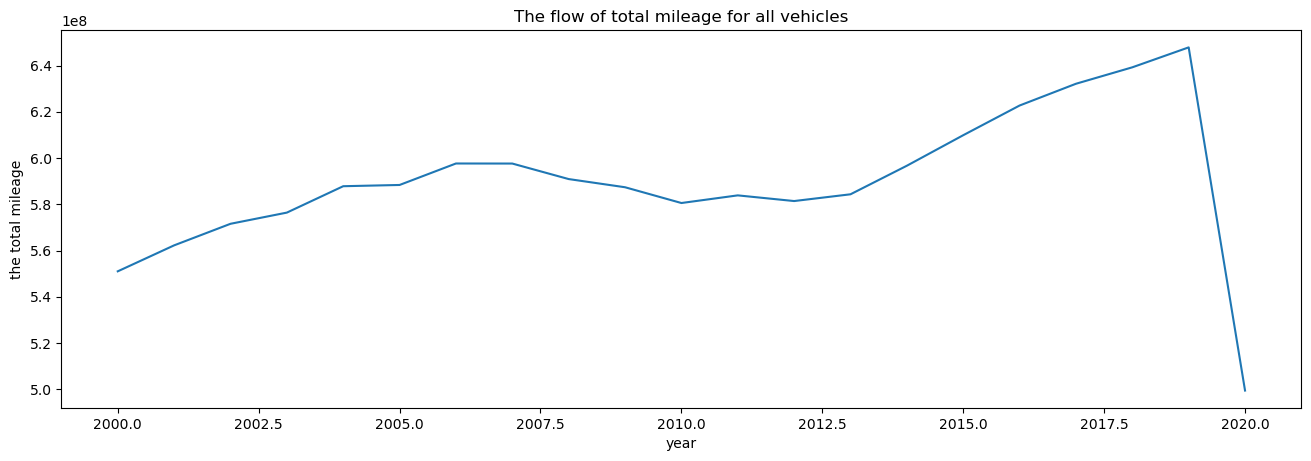

In [6]:
# visulisation of total mileage for all vehicles
major_df['total_miles'] = (major_df['all_hgvs']+major_df['all_motor_vehicles'])*major_df['link_length_miles']

filter_df2 = major_df[['year','total_miles']]

plt.figure(figsize=(16,5), dpi=100)
plt.plot(filter_df2.groupby('year').sum())
plt.gca().set(title='The flow of total mileage for all vehicles', xlabel='year', ylabel='the total mileage')

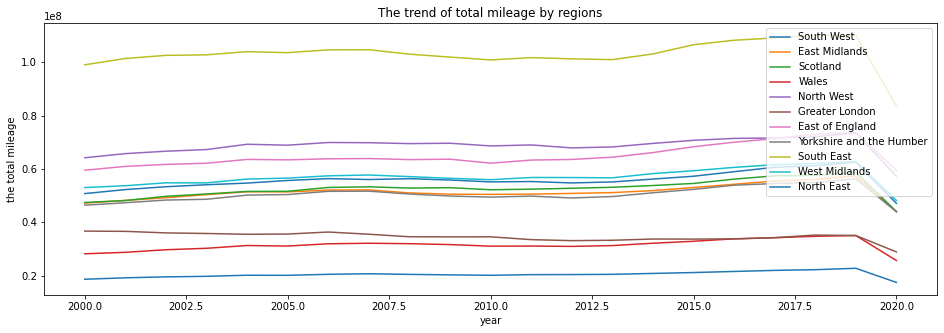

In [129]:
# major_df.loc[(major_df['region_id']=='1')]

region_1 = major_df[major_df['region_id']==1][['region_id','year','total_miles']]
region_2 = major_df[major_df['region_id']==2][['region_id','year','total_miles']]
region_3 = major_df[major_df['region_id']==3][['region_id','year','total_miles']]
region_4 = major_df[major_df['region_id']==4][['region_id','year','total_miles']]
region_5 = major_df[major_df['region_id']==5][['region_id','year','total_miles']]
region_6 = major_df[major_df['region_id']==6][['region_id','year','total_miles']]
region_7 = major_df[major_df['region_id']==7][['region_id','year','total_miles']]
region_8 = major_df[major_df['region_id']==8][['region_id','year','total_miles']]
region_9 = major_df[major_df['region_id']==9][['region_id','year','total_miles']]
region_10 = major_df[major_df['region_id']==10][['region_id','year','total_miles']]
region_11 = major_df[major_df['region_id']==11][['region_id','year','total_miles']]
val_1 = region_1.groupby(['region_id','year']).sum()
val_2 = region_2.groupby(['region_id','year']).sum()
val_3 = region_3.groupby(['region_id','year']).sum()
val_4 = region_4.groupby(['region_id','year']).sum()
val_5 = region_5.groupby(['region_id','year']).sum()
val_6 = region_6.groupby(['region_id','year']).sum()
val_7 = region_7.groupby(['region_id','year']).sum()
val_8 = region_8.groupby(['region_id','year']).sum()
val_9 = region_9.groupby(['region_id','year']).sum()
val_10 = region_10.groupby(['region_id','year']).sum()
val_11 = region_11.groupby(['region_id','year']).sum()

val_1 = val_1['total_miles']
val_2 = val_2['total_miles']
val_3 = val_3['total_miles']
val_4 = val_4['total_miles']
val_5 = val_5['total_miles']
val_6 = val_6['total_miles']
val_7 = val_7['total_miles']
val_8 = val_8['total_miles']
val_9 = val_9['total_miles']
val_10 = val_10['total_miles']
val_11 = val_11['total_miles']

results = pd.DataFrame({'South West': val_1.values, 'East Midlands': val_2.values, 'Scotland': val_3.values,
                      'Wales': val_4.values, 'North West': val_5.values, 'Greater London': val_6.values,
                      'East of England': val_7.values, 'Yorkshire and the Humber': val_8.values, 
                      'South East': val_9.values,'West Midlands': val_10.values, 'North East': val_11.values},
                      index = major_df['year'].sort_values().unique())


plt.figure(figsize=(16,5))
plt.plot(results)
plt.gca().set(title='The trend of total mileage by regions', xlabel= 'year', ylabel='the total mileage')
plt.legend(results.columns,loc='upper right')

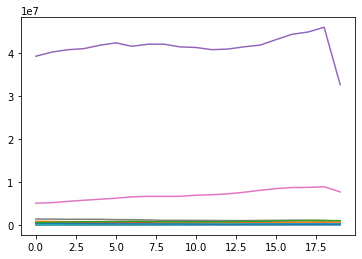

In [138]:
test1 = major_df[major_df['region_id']==1][['year','region_id','local_authority_id','pedal_cycles_miles'
                        ,'two_wheeled_motor_vehicles_miles','cars_and_taxis_miles','buses_and_coaches_miles','lgvs_miles'
                        ,'hgvs_2_rigid_axle_miles','hgvs_3_rigid_axle_miles','hgvs_4_or_more_rigid_axle_miles'
                        ,'hgvs_3_or_4_articulated_axle_miles','hgvs_5_articulated_axle_miles','hgvs_6_articulated_axle_miles']]

test_val = test1.groupby('year').sum()
t = test_val[1:].values
plt.plot(t)

# Task 2: Regression

In [7]:
series = filtered_df[['year','pedal_cycles_miles','two_wheeled_motor_vehicles_miles'
                      ,'cars_and_taxis_miles','buses_and_coaches_miles','lgvs_miles','hgvs_2_rigid_axle_miles'
                      ,'hgvs_3_rigid_axle_miles','hgvs_4_or_more_rigid_axle_miles'
                      ,'hgvs_3_or_4_articulated_axle_miles','hgvs_5_articulated_axle_miles'
                      ,'hgvs_6_articulated_axle_miles']]

pedal_cycle = series[['year','pedal_cycles_miles']].groupby('year').sum()
two_wheeled = series[['year','two_wheeled_motor_vehicles_miles']].groupby('year').sum()
car_and_taxi = series[['year','cars_and_taxis_miles']].groupby('year').sum()
buses_and_coaches = series[['year','buses_and_coaches_miles']].groupby('year').sum()
lgvs = series[['year','lgvs_miles']].groupby('year').sum()
hgvs_2 = series[['year','hgvs_2_rigid_axle_miles']].groupby('year').sum()
hgvs_3 = series[['year','hgvs_3_rigid_axle_miles']].groupby('year').sum()
hgvs_4 = series[['year','hgvs_4_or_more_rigid_axle_miles']].groupby('year').sum()
hgvs_3_or_4 = series[['year','hgvs_3_or_4_articulated_axle_miles']].groupby('year').sum()
hgvs_5 = series[['year','hgvs_5_articulated_axle_miles']].groupby('year').sum()
hgvs_6 = series[['year','hgvs_6_articulated_axle_miles']].groupby('year').sum()


y_pedal = pedal_cycle['pedal_cycles_miles']
y_two = two_wheeled['two_wheeled_motor_vehicles_miles']
y_car_and_taxi = car_and_taxi['cars_and_taxis_miles']
y_buses_and_coaches = buses_and_coaches['buses_and_coaches_miles']
y_lgvs = lgvs['lgvs_miles']
y_hgvs_2 = hgvs_2['hgvs_2_rigid_axle_miles']
y_hgvs_3 = hgvs_3['hgvs_3_rigid_axle_miles']
y_hgvs_4 = hgvs_4['hgvs_4_or_more_rigid_axle_miles']
y_hgvs_3_or_4 = hgvs_3_or_4['hgvs_3_or_4_articulated_axle_miles']
y_hgvs_5 = hgvs_5['hgvs_5_articulated_axle_miles']
y_hgvs_6 = hgvs_6['hgvs_6_articulated_axle_miles']


pedal = pd.DataFrame({'ds':y_pedal.index, 'y':y_pedal.values})
two = pd.DataFrame({'ds':y_two.index, 'y':y_two.values})
car = pd.DataFrame({'ds':y_car_and_taxi.index, 'y':y_car_and_taxi.values})
buses = pd.DataFrame({'ds':y_buses_and_coaches.index, 'y':y_buses_and_coaches.values})
lgvs = pd.DataFrame({'ds':y_lgvs.index, 'y':y_lgvs.values})
hgvs2 = pd.DataFrame({'ds':y_hgvs_2.index, 'y':y_hgvs_2.values})
hgvs3 = pd.DataFrame({'ds':y_hgvs_3.index, 'y':y_hgvs_3.values})
hgvs4 = pd.DataFrame({'ds':y_hgvs_4.index, 'y':y_hgvs_4.values})
hgvs3or4 = pd.DataFrame({'ds':y_hgvs_3_or_4.index, 'y':y_hgvs_3_or_4.values})
hgvs5 = pd.DataFrame({'ds':y_hgvs_5.index, 'y':y_hgvs_5.values})
hgvs6 = pd.DataFrame({'ds':y_hgvs_6.index, 'y':y_hgvs_6.values})

In [8]:
def conv_date(df):
    for i in range(df.shape[0]):
        df['ds'][i] = pd.to_datetime(datetime.datetime(df['ds'][i], 1, 1,0,0))
conv_date(pedal)
conv_date(two)
conv_date(car)
conv_date(buses)
conv_date(lgvs)
conv_date(hgvs2)
conv_date(hgvs3)
conv_date(hgvs4)
conv_date(hgvs3or4)
conv_date(hgvs5)
conv_date(hgvs6)

<ipython-input-8-b14145d67827>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'][i] = pd.to_datetime(datetime.datetime(df['ds'][i], 1, 1,0,0))


INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


<Figure size 1296x432 with 0 Axes>

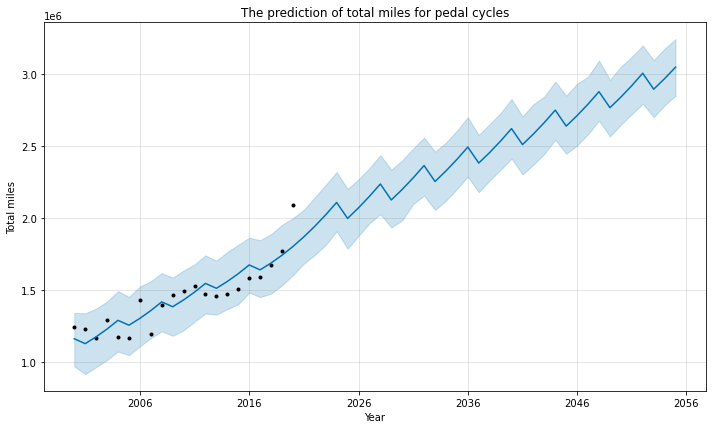

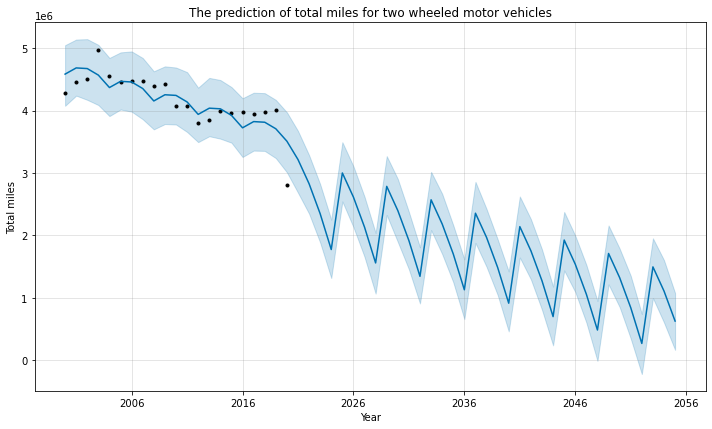

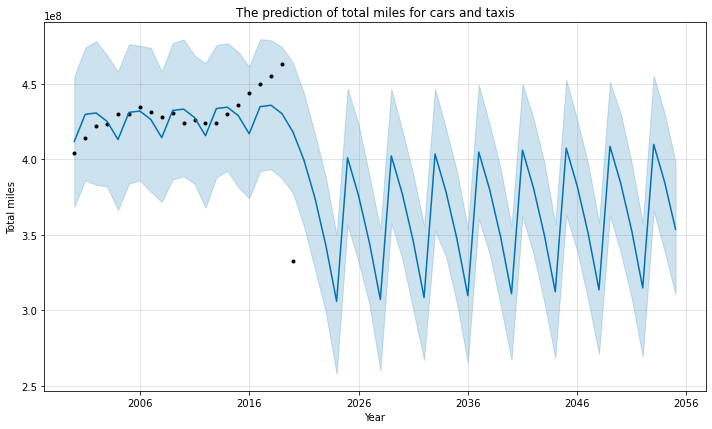

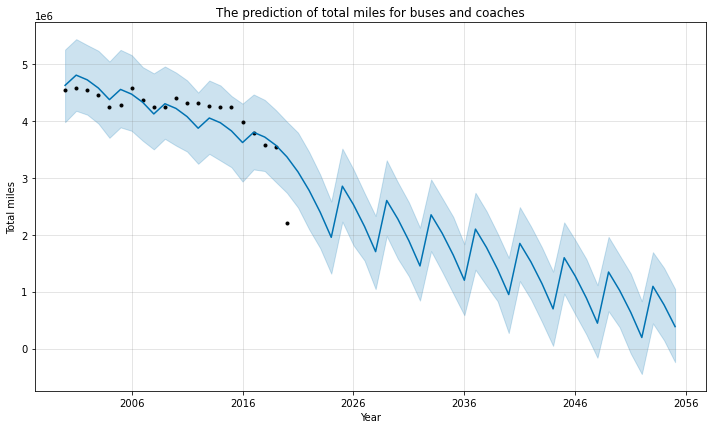

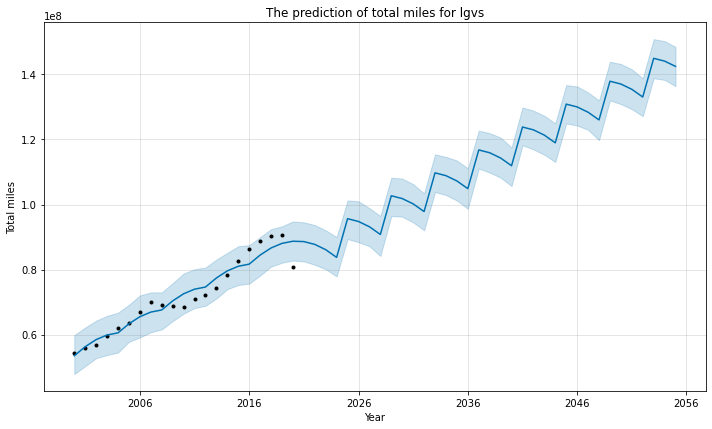

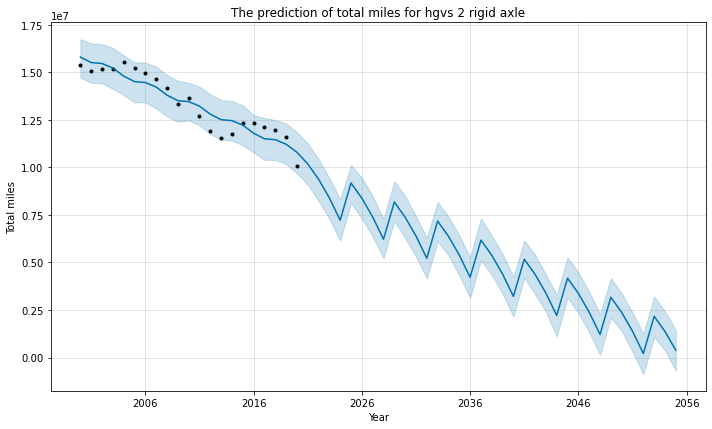

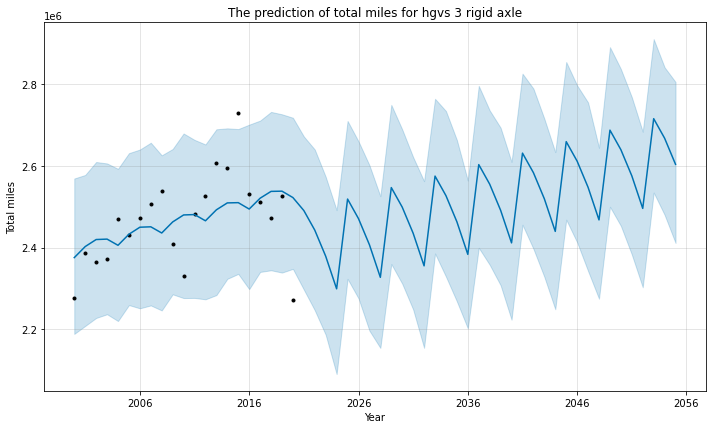

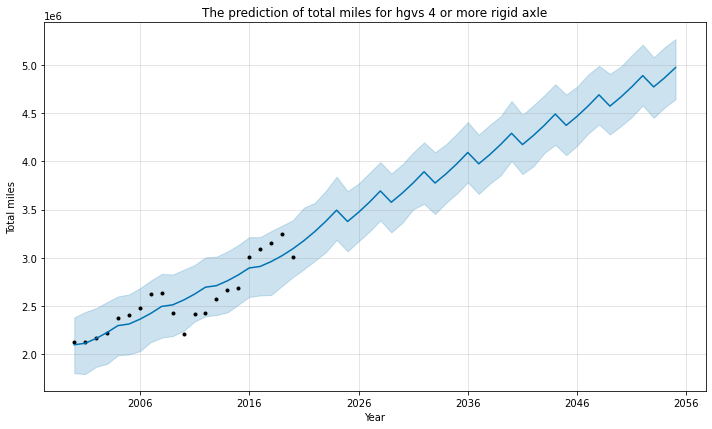

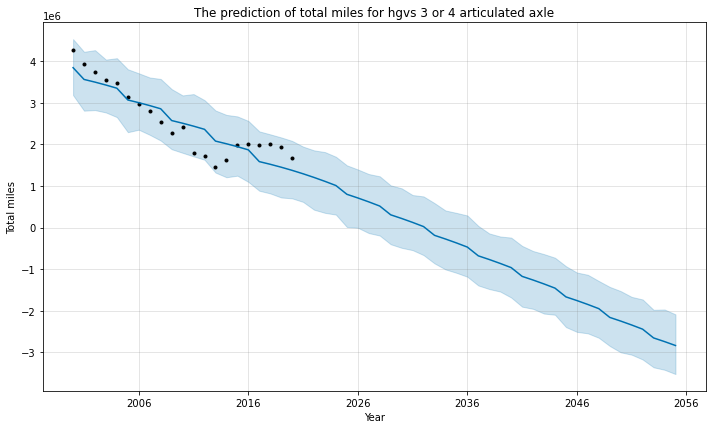

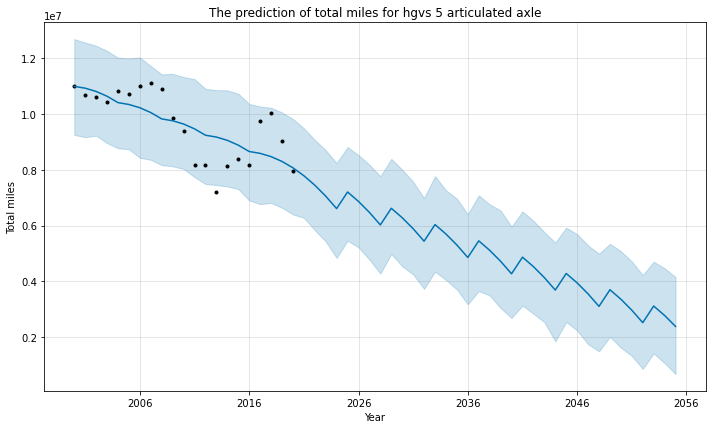

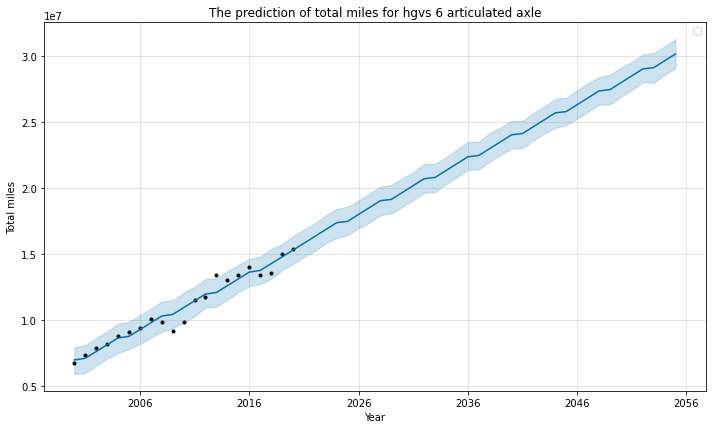

In [9]:
pedal_mod = Prophet(interval_width=0.95, weekly_seasonality=False, daily_seasonality=False)
two_mod = Prophet(interval_width=0.95, weekly_seasonality=False, daily_seasonality=False)
car_mod = Prophet(interval_width=0.95, weekly_seasonality=False, daily_seasonality=False)
buses_mod = Prophet(interval_width=0.95, weekly_seasonality=False, daily_seasonality=False)
lgvs_mod = Prophet(interval_width=0.95, weekly_seasonality=False, daily_seasonality=False)
hgvs2_mod = Prophet(interval_width=0.95, weekly_seasonality=False, daily_seasonality=False)
hgvs3_mod = Prophet(interval_width=0.95, weekly_seasonality=False, daily_seasonality=False)
hgvs4_mod = Prophet(interval_width=0.95, weekly_seasonality=False, daily_seasonality=False)
hgvs3or4_mod = Prophet(interval_width=0.95, weekly_seasonality=False, daily_seasonality=False)
hgvs5_mod = Prophet(interval_width=0.95, weekly_seasonality=False, daily_seasonality=False)
hgvs6_mod = Prophet(interval_width=0.95, weekly_seasonality=False, daily_seasonality=False)

pedal_mod.fit(pedal)
two_mod.fit(two)
car_mod.fit(car)
buses_mod.fit(buses)
lgvs_mod.fit(lgvs)
hgvs2_mod.fit(hgvs2)
hgvs3_mod.fit(hgvs3)
hgvs4_mod.fit(hgvs4)
hgvs3or4_mod.fit(hgvs3or4)
hgvs5_mod.fit(hgvs5)
hgvs6_mod.fit(hgvs6)


pedal_forecast = pedal_mod.make_future_dataframe(periods=35, freq='Y')
pedal_forecast = pedal_mod.predict(pedal_forecast)

two_forecast = two_mod.make_future_dataframe(periods=35, freq='Y')
two_forecast = two_mod.predict(two_forecast)

car_forecast = car_mod.make_future_dataframe(periods=35, freq='Y')
car_forecast = car_mod.predict(car_forecast)

buses_forecast = buses_mod.make_future_dataframe(periods=35, freq='Y')
buses_forecast = buses_mod.predict(buses_forecast)

lgvs_forecast = lgvs_mod.make_future_dataframe(periods=35, freq='Y')
lgvs_forecast = lgvs_mod.predict(lgvs_forecast)

hgvs2_forecast = hgvs2_mod.make_future_dataframe(periods=35, freq='Y')
hgvs2_forecast = hgvs2_mod.predict(hgvs2_forecast)

hgvs3_forecast = hgvs3_mod.make_future_dataframe(periods=35, freq='Y')
hgvs3_forecast = hgvs3_mod.predict(hgvs3_forecast)

hgvs4_forecast = hgvs4_mod.make_future_dataframe(periods=35, freq='Y')
hgvs4_forecast = hgvs4_mod.predict(hgvs4_forecast)

hgvs3or4_forecast = hgvs3or4_mod.make_future_dataframe(periods=35, freq='Y')
hgvs3or4_forecast = hgvs3or4_mod.predict(hgvs3or4_forecast)

hgvs5_forecast = hgvs5_mod.make_future_dataframe(periods=35, freq='Y')
hgvs5_forecast = hgvs5_mod.predict(hgvs5_forecast)

hgvs6_forecast = hgvs6_mod.make_future_dataframe(periods=35, freq='Y')
hgvs6_forecast = hgvs6_mod.predict(hgvs6_forecast)

plt.figure(figsize=(18,6))
pedal_mod.plot(pedal_forecast, xlabel = 'Year', ylabel = 'Total miles')
plt.title("The prediction of total miles for pedal cycles")
two_mod.plot(two_forecast, xlabel = 'Year', ylabel = 'Total miles')
plt.title("The prediction of total miles for two wheeled motor vehicles")
car_mod.plot(car_forecast, xlabel = 'Year', ylabel = 'Total miles')
plt.title("The prediction of total miles for cars and taxis")
buses_mod.plot(buses_forecast, xlabel = 'Year', ylabel = 'Total miles')
plt.title("The prediction of total miles for buses and coaches")
lgvs_mod.plot(lgvs_forecast, xlabel = 'Year', ylabel = 'Total miles')
plt.title("The prediction of total miles for lgvs")
hgvs2_mod.plot(hgvs2_forecast, xlabel = 'Year', ylabel = 'Total miles')
plt.title("The prediction of total miles for hgvs 2 rigid axle")
hgvs3_mod.plot(hgvs3_forecast, xlabel = 'Year', ylabel = 'Total miles')
plt.title("The prediction of total miles for hgvs 3 rigid axle")
hgvs4_mod.plot(hgvs4_forecast, xlabel = 'Year', ylabel = 'Total miles')
plt.title("The prediction of total miles for hgvs 4 or more rigid axle")
hgvs3or4_mod.plot(hgvs3or4_forecast, xlabel = 'Year', ylabel = 'Total miles')
plt.title("The prediction of total miles for hgvs 3 or 4 articulated axle")
hgvs5_mod.plot(hgvs5_forecast, xlabel = 'Year', ylabel = 'Total miles')
plt.title("The prediction of total miles for hgvs 5 articulated axle")
hgvs6_mod.plot(hgvs6_forecast, xlabel = 'Year', ylabel = 'Total miles')
plt.title("The prediction of total miles for hgvs 6 articulated axle")
plt.legend()

In 2020, due to the covid 19, the total mileage was dropped regardless of the type of vehicles, I therefore decided to make another prediction excluding the data in 2020 as dealing with the potential risk. 

INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


<Figure size 1296x432 with 0 Axes>

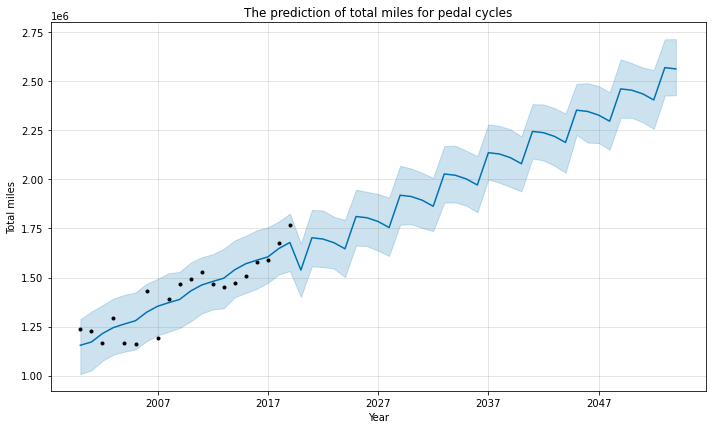

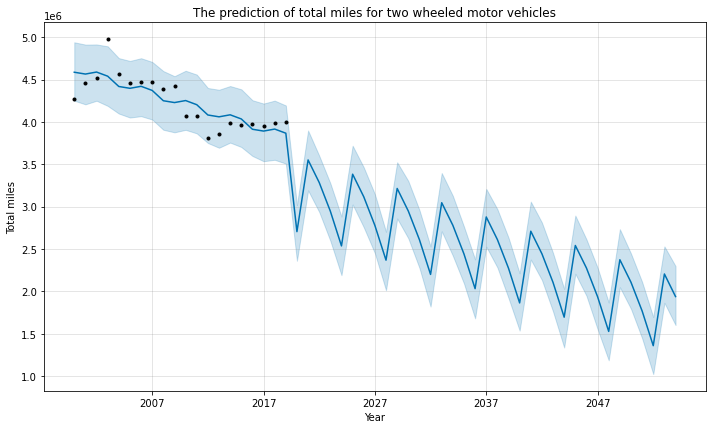

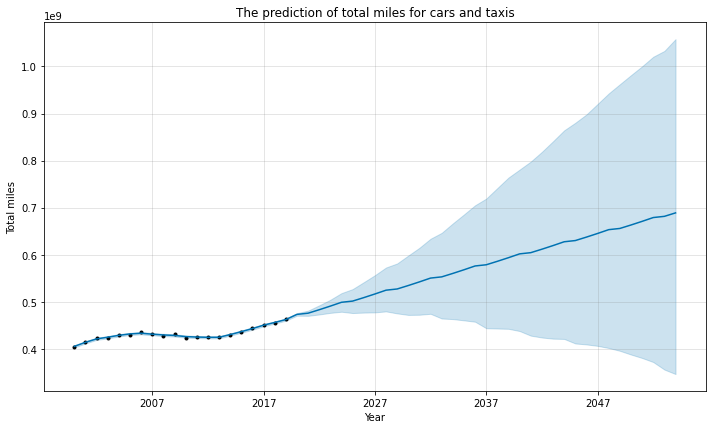

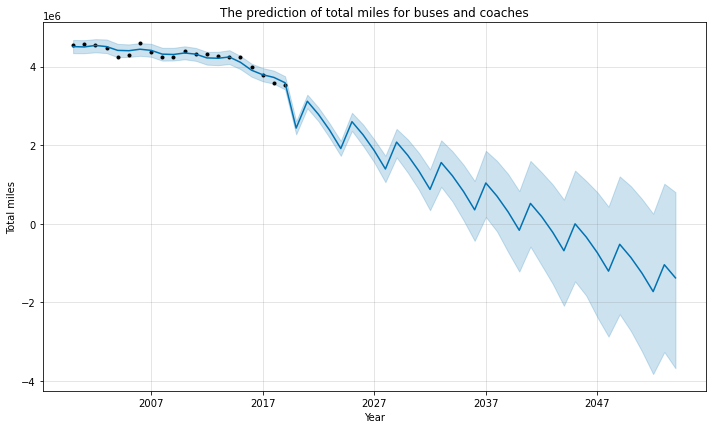

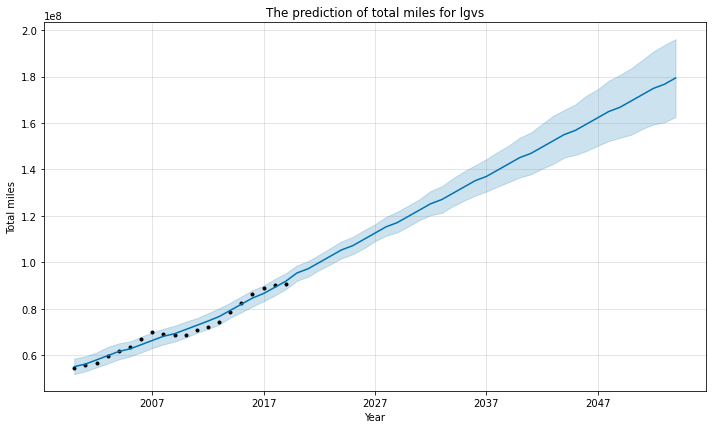

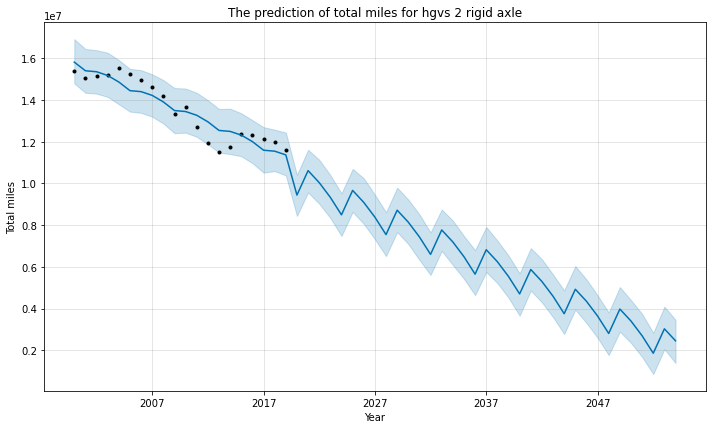

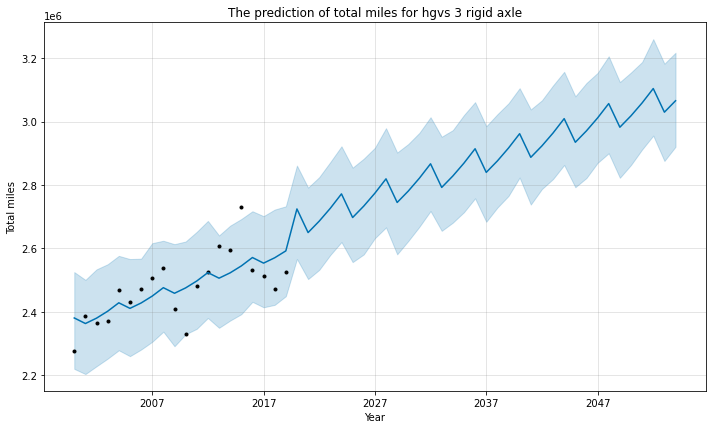

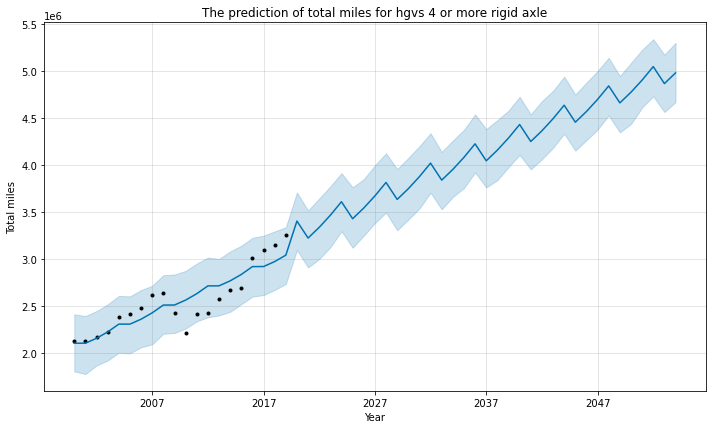

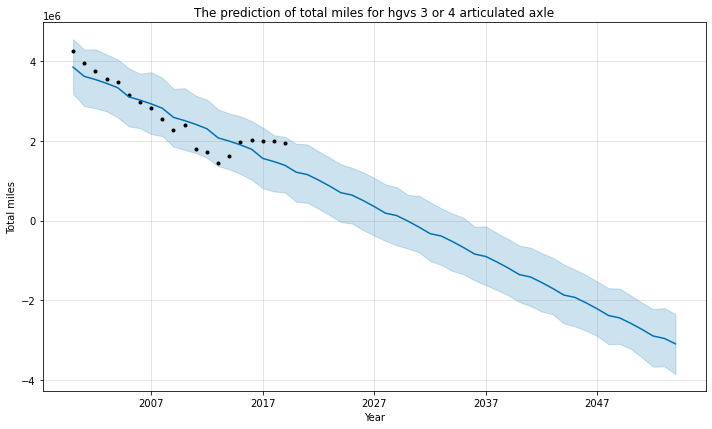

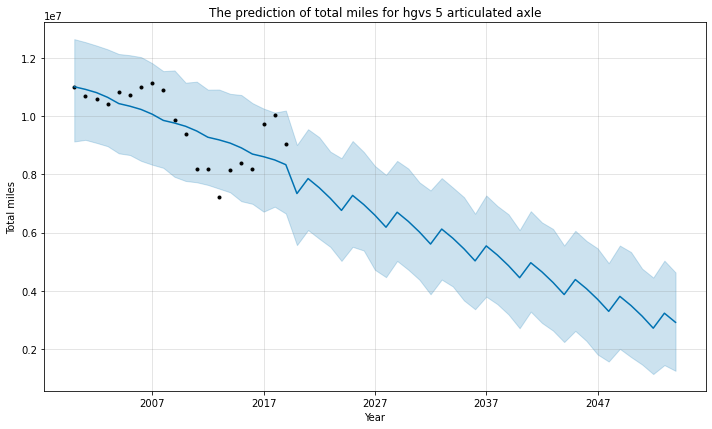

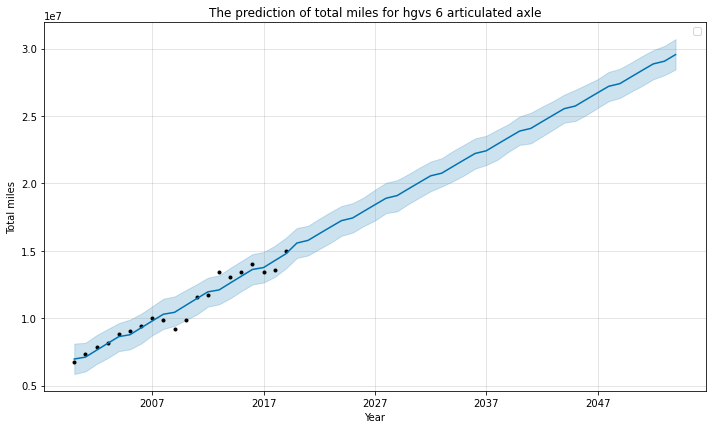

In [10]:
pedal_mod2 = Prophet(interval_width=0.95, weekly_seasonality=False, daily_seasonality=False)
two_mod2 = Prophet(interval_width=0.95, weekly_seasonality=False, daily_seasonality=False)
car_mod2 = Prophet(interval_width=0.95, weekly_seasonality=False, daily_seasonality=False)
buses_mod2 = Prophet(interval_width=0.95, weekly_seasonality=False, daily_seasonality=False)
lgvs_mod2 = Prophet(interval_width=0.95, weekly_seasonality=False, daily_seasonality=False)
hgvs2_mod2 = Prophet(interval_width=0.95, weekly_seasonality=False, daily_seasonality=False)
hgvs3_mod2 = Prophet(interval_width=0.95, weekly_seasonality=False, daily_seasonality=False)
hgvs4_mod2 = Prophet(interval_width=0.95, weekly_seasonality=False, daily_seasonality=False)
hgvs3or4_mod2 = Prophet(interval_width=0.95, weekly_seasonality=False, daily_seasonality=False)
hgvs5_mod2 = Prophet(interval_width=0.95, weekly_seasonality=False, daily_seasonality=False)
hgvs6_mod2 = Prophet(interval_width=0.95, weekly_seasonality=False, daily_seasonality=False)

pedal_mod2.fit(pedal[:-1])
two_mod2.fit(two[:-1])
car_mod2.fit(car[:-1])
buses_mod2.fit(buses[:-1])
lgvs_mod2.fit(lgvs[:-1])
hgvs2_mod2.fit(hgvs2[:-1])
hgvs3_mod2.fit(hgvs3[:-1])
hgvs4_mod2.fit(hgvs4[:-1])
hgvs3or4_mod2.fit(hgvs3or4[:-1])
hgvs5_mod2.fit(hgvs5[:-1])
hgvs6_mod2.fit(hgvs6[:-1])


pedal_forecast = pedal_mod2.make_future_dataframe(periods=35, freq='Y')
pedal_forecast = pedal_mod2.predict(pedal_forecast)

two_forecast = two_mod2.make_future_dataframe(periods=35, freq='Y')
two_forecast = two_mod2.predict(two_forecast)

car_forecast = car_mod2.make_future_dataframe(periods=35, freq='Y')
car_forecast = car_mod2.predict(car_forecast)

buses_forecast = buses_mod2.make_future_dataframe(periods=35, freq='Y')
buses_forecast = buses_mod2.predict(buses_forecast)

lgvs_forecast = lgvs_mod2.make_future_dataframe(periods=35, freq='Y')
lgvs_forecast = lgvs_mod2.predict(lgvs_forecast)

hgvs2_forecast = hgvs2_mod2.make_future_dataframe(periods=35, freq='Y')
hgvs2_forecast = hgvs2_mod2.predict(hgvs2_forecast)

hgvs3_forecast = hgvs3_mod2.make_future_dataframe(periods=35, freq='Y')
hgvs3_forecast = hgvs3_mod2.predict(hgvs3_forecast)

hgvs4_forecast = hgvs4_mod2.make_future_dataframe(periods=35, freq='Y')
hgvs4_forecast = hgvs4_mod2.predict(hgvs4_forecast)

hgvs3or4_forecast = hgvs3or4_mod2.make_future_dataframe(periods=35, freq='Y')
hgvs3or4_forecast = hgvs3or4_mod2.predict(hgvs3or4_forecast)

hgvs5_forecast = hgvs5_mod2.make_future_dataframe(periods=35, freq='Y')
hgvs5_forecast = hgvs5_mod2.predict(hgvs5_forecast)

hgvs6_forecast = hgvs6_mod2.make_future_dataframe(periods=35, freq='Y')
hgvs6_forecast = hgvs6_mod2.predict(hgvs6_forecast)


plt.figure(figsize=(18,6))
pedal_mod2.plot(pedal_forecast, xlabel = 'Year', ylabel = 'Total miles')
plt.title("The prediction of total miles for pedal cycles")
two_mod2.plot(two_forecast, xlabel = 'Year', ylabel = 'Total miles')
plt.title("The prediction of total miles for two wheeled motor vehicles")
car_mod2.plot(car_forecast, xlabel = 'Year', ylabel = 'Total miles')
plt.title("The prediction of total miles for cars and taxis")
buses_mod2.plot(buses_forecast, xlabel = 'Year', ylabel = 'Total miles')
plt.title("The prediction of total miles for buses and coaches")
lgvs_mod2.plot(lgvs_forecast, xlabel = 'Year', ylabel = 'Total miles')
plt.title("The prediction of total miles for lgvs")
hgvs2_mod2.plot(hgvs2_forecast, xlabel = 'Year', ylabel = 'Total miles')
plt.title("The prediction of total miles for hgvs 2 rigid axle")
hgvs3_mod2.plot(hgvs3_forecast, xlabel = 'Year', ylabel = 'Total miles')
plt.title("The prediction of total miles for hgvs 3 rigid axle")
hgvs4_mod2.plot(hgvs4_forecast, xlabel = 'Year', ylabel = 'Total miles')
plt.title("The prediction of total miles for hgvs 4 or more rigid axle")
hgvs3or4_mod2.plot(hgvs3or4_forecast, xlabel = 'Year', ylabel = 'Total miles')
plt.title("The prediction of total miles for hgvs 3 or 4 articulated axle")
hgvs5_mod2.plot(hgvs5_forecast, xlabel = 'Year', ylabel = 'Total miles')
plt.title("The prediction of total miles for hgvs 5 articulated axle")
hgvs6_mod2.plot(hgvs6_forecast, xlabel = 'Year', ylabel = 'Total miles')
plt.title("The prediction of total miles for hgvs 6 articulated axle")
plt.legend()

# Task 3 : Research

### 1. estimate the number of electric miles driven each year over the time period with model I made

: Using Prophet library, the total mileages of vehicles would be 983,945,800 in 2050, and according to the press, the percentage of EV vehicles was occupied at 3.1% to 10.7% from 2019 to 2020 (Autocar, 2021). Under these records, we can assume more than 80.4% of the registered car in the UK would be electrified in 2050. So, the estimates would be 983,945,800*80.4% = 791,092,423 mileages. 


Autocar, 2021. Analysis: 2020 UK car sales hit 28-year low, EV market grows rapidly [online] Available from: <https://www.autocar.co.uk/car-news/industry-news-dealership%2C-sales-and-marketing/analysis-2020-uk-car-sales-hit-28-year-low-ev> [Accessed 25 April 2022].

Deloitte LLP, 2019. The opportunities around electric vehicle charge points in the UK [online] Available from: <https://www2.deloitte.com/content/dam/Deloitte/uk/Documents/energy-resources/deloitte-uk-Electric-Vehicles-uk.pdf> [Accessed 25 April 2022].


<ipython-input-8-b14145d67827>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'][i] = pd.to_datetime(datetime.datetime(df['ds'][i], 1, 1,0,0))
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


,ds,trend,yhat
0,2000-01-01,2.779311e+07,5.514092e+08
1,2001-01-01,4.272252e+07,5.618512e+08
2,2002-01-01,5.456835e+07,5.710903e+08
3,2003-01-01,5.953072e+07,5.770013e+08
4,2004-01-01,6.449309e+07,5.872590e+08
5,2005-01-01,6.946906e+07,5.895574e+08
6,2006-01-01,7.445413e+07,5.968580e+08
7,2007-01-01,7.627570e+07,5.972879e+08
8,2008-01-01,7.192779e+07,5.912728e+08
9,2009-01-01,6.756797e+07,5.868061e+08


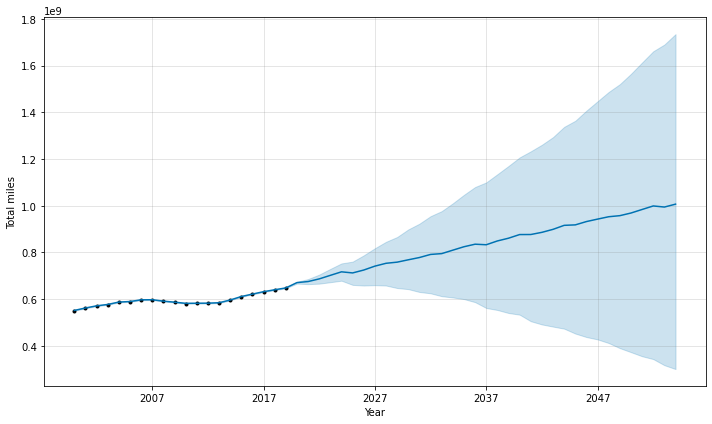

In [11]:
y_filter = filter_df2.groupby('year').sum()
y_filter = y_filter['total_miles']

_filter = pd.DataFrame({'ds':y_filter.index, 'y':y_filter.values})
conv_date(_filter)

filter_mod = Prophet(interval_width=0.95, weekly_seasonality=True, daily_seasonality=True)
filter_mod.fit(_filter[:-1])

filter_forecast = filter_mod.make_future_dataframe(periods=35, freq='Y')
filter_forecast = filter_mod.predict(filter_forecast)
filter_mod.plot(filter_forecast, xlabel = 'Year', ylabel = 'Total miles')

# estimates of total miles : yhat
filter_forecast[['ds','trend','yhat']]

<ipython-input-8-b14145d67827>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'][i] = pd.to_datetime(datetime.datetime(df['ds'][i], 1, 1,0,0))
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.


,ds,yhat
0,2015-01-01,-2.267397
1,2018-01-01,6.429822
2,2019-01-01,7.473496
3,2020-01-01,8.573716
4,2021-01-01,15.181897
5,2021-12-31,10.950050
6,2022-12-31,12.229041
7,2023-12-31,13.570327
8,2024-12-31,19.472964
9,2025-12-31,20.690943


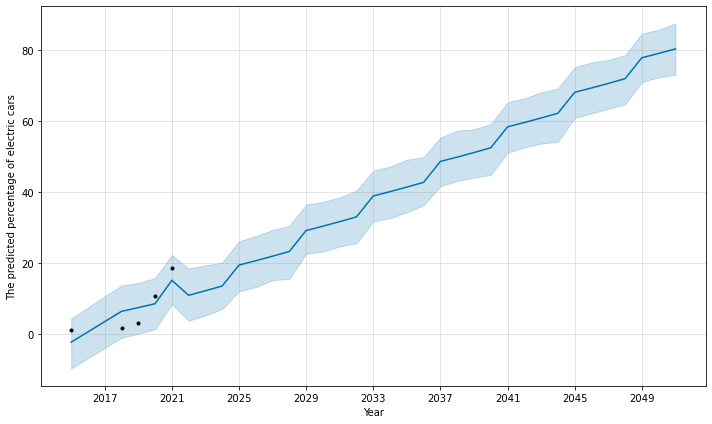

In [12]:
# estimates of the percentage of electric cars over years
data = [[2015,1.1],[2018,1.8],[2019,3.2],[2020,10.7],[2021,18.6]]
electric = pd.DataFrame(data, columns = ['ds','y'])
conv_date(electric)


electric_mod = Prophet(interval_width=0.95, weekly_seasonality=False, daily_seasonality=False)
electric_mod.fit(electric)

electric_forecast = electric_mod.make_future_dataframe(periods=30, freq='Y')
electric_forecast = electric_mod.predict(electric_forecast)
electric_mod.plot(electric_forecast, xlabel = 'Year', ylabel = 'The predicted percentage of electric cars')

# estimates of percentage of electric cars: yhat
electric_forecast[['ds','yhat']]

In [13]:
merge = electric_forecast[['ds','yhat']].merge(filter_forecast[['ds','trend','yhat']], how='inner', on='ds')
merge['electric_miles'] = merge['yhat_x']*merge['yhat_y']
# the estimates of the number of electric miles 
merge[['ds','electric_miles']]


,ds,electric_miles
0,2015-01-01,-1.385325e+09
1,2018-01-01,4.114662e+09
2,2019-01-01,4.841887e+09
3,2021-12-31,7.517205e+09
4,2022-12-31,8.581224e+09
5,2023-12-31,9.727154e+09
6,2024-12-31,1.386640e+10
7,2025-12-31,1.499004e+10
8,2026-12-31,1.628363e+10
9,2027-12-31,1.756149e+10


### 2. estimate how much power generation will be needed to achieve this

: On the side of energy consumption, the average EVs travel 8,000miles a year and it means that typical electric cars will use about 2,000 kWh(=2 MWh) a year. Regardless of the development of technology, we can assume the total energy assumption can be seen below.

So we can predict there would be 1.585470e+07 electric cars in 2050 and will need 3.170940e+07 MWh at that time. 



Goodall, C., 2017. 100% EVs can be easily accommodated on the UK grid. [online] Available from: <https://www.carboncommentary.com/blog/2017/7/26/100-evs-can-be-easily-accommodated-on-the-uk-grid#:~:text=The%20average%20car%20in%20the,about%202%2C000%20kWh%20a%20year> [Accessed 25 April 2022].


Ofgem, 2021. Enabling the transition to electric vehicles [online] Available from: <https://www.ofgem.gov.uk/sites/default/files/2021-09/Enabling%20the%20transition%20to%20electric%20vehicles%20-%20the%20regulators%20priorities%20for%20a%20green%20fair%20future.pdf> [Accessed 25 April 2022].


<ipython-input-8-b14145d67827>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'][i] = pd.to_datetime(datetime.datetime(df['ds'][i], 1, 1,0,0))
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.


,ds,trend,yhat
0,2017-01-01,5.007183e+06,4.426600e+04
1,2018-01-01,5.539046e+06,5.974000e+04
2,2019-01-01,6.049308e+06,9.756500e+04
3,2020-01-01,6.587996e+06,2.057700e+05
4,2030-01-01,1.197931e+07,6.500000e+06
5,2030-12-31,1.251652e+07,5.073557e+06
6,2031-12-31,1.305521e+07,5.328264e+06
7,2032-12-31,1.359537e+07,6.822546e+06
8,2033-12-31,1.413406e+07,7.008387e+06
9,2034-12-31,1.467275e+07,7.229786e+06


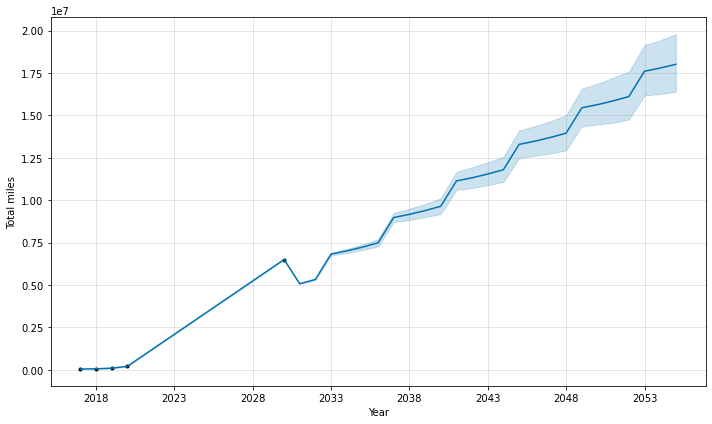

In [14]:
# prediction of electric vehicles over years
data = [[2017,44266],[2018,59740],[2019,97565],[2020,205770],[2030,6500000]]
cars = pd.DataFrame(data, columns = ['ds','y'])
conv_date(cars)


cars_mod = Prophet(interval_width=0.95, weekly_seasonality=False, daily_seasonality=False)
cars_mod.fit(cars)

cars_forecast = cars_mod.make_future_dataframe(periods=25, freq='Y')
cars_forecast = cars_mod.predict(cars_forecast)
cars_mod.plot(cars_forecast, xlabel = 'Year', ylabel = 'Total miles')

# estimates of the total number of electric cars: yhat
cars_forecast[['ds','trend','yhat']]

In [15]:
# estimates for energy consumption (MWh a year from 2017 to 2054)
cars_forecast['energy_consumption'] = cars_forecast['yhat']*2
cars_forecast[['ds','energy_consumption']]

,ds,energy_consumption
0,2017-01-01,8.853200e+04
1,2018-01-01,1.194800e+05
2,2019-01-01,1.951300e+05
3,2020-01-01,4.115400e+05
4,2030-01-01,1.300000e+07
5,2030-12-31,1.014711e+07
6,2031-12-31,1.065653e+07
7,2032-12-31,1.364509e+07
8,2033-12-31,1.401677e+07
9,2034-12-31,1.445957e+07


### 3. identify how much additional generation capacity this will require

: Under the historic data, it is assumed by the article that we need at least 75TWh for all electric cars a year and this figure means that the electricity needed would rise by approximately 20% per year.

Under my estimates, we will need around 10.14 TWh in 2030, and 15.85TWh in 2050, respectively. So the additional generation capacity would be 15 TWh compared to the data in 2020.




Goodall, C., 2017. 100% EVs can be easily accommodated on the UK grid. [online] Available from: <https://www.carboncommentary.com/blog/2017/7/26/100-evs-can-be-easily-accommodated-on-the-uk-grid#:~:text=The%20average%20car%20in%20the,about%202%2C000%20kWh%20a%20year> [Accessed 25 April 2022].


### 4. attempt to locate at least one other independent estimate of this for comparison to your own estimate.

: To the paper from ofgem, electric cars and vans will need between 60-100 TWh of electricity annually by 2050, so my prediction and the prediction given by the report have a big difference. 




Department for Business, Energy & Industrial Strategy, 2020. ELECTRICITY GENERATION COSTS 2020 [online] Available from: <https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/911817/electricity-generation-cost-report-2020.pdf> [Accessed 25 April 2022].

# Task 4

### 1. making a recommendation of the amount and type of new generation capacity that will be needed to meet demand at the lowest overall cost.

: In the given paper from the UK government, I used the mean of estimated cost by type and predicted the values in 2050. 

-> the lowest overall cost is £1,466,192,000 

<ipython-input-8-b14145d67827>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'][i] = pd.to_datetime(datetime.datetime(df['ds'][i], 1, 1,0,0))
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.


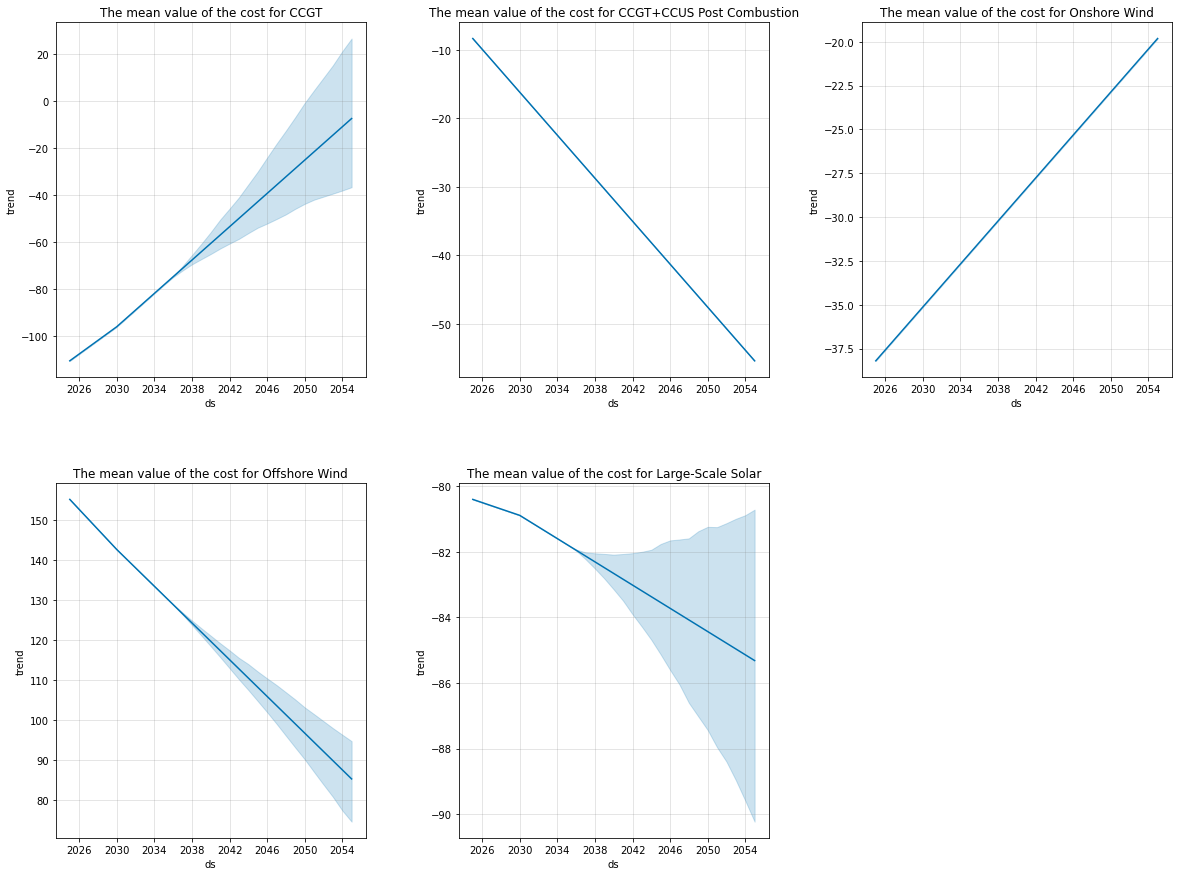

In [16]:
# under the government paper, these values are the mean of min and max levelised cost

CCGT = [[2025, 50],[2030, 61], [2035, 77]]
CCGT_CCUS = [[2025, 66.5],[2030, 71.5], [2035, 49.5]]
Onshore = [[2025, 64.5],[2030, 73], [2035, 73.5]]
Offshore = [[2025, 77],[2030, 72], [2035, 69]]
Solar = [[2025, 59.5],[2030, 57], [2035, 53]]


CCGT = pd.DataFrame(CCGT, columns = ['ds','y'])
CCGT_CCUS = pd.DataFrame(CCGT_CCUS, columns = ['ds','y'])
Onshore = pd.DataFrame(Onshore, columns = ['ds','y'])
Offshore = pd.DataFrame(Offshore, columns = ['ds','y'])
Solar = pd.DataFrame(Solar, columns = ['ds','y'])

conv_date(CCGT)
conv_date(CCGT_CCUS)
conv_date(Onshore)
conv_date(Offshore)
conv_date(Solar)

CCGT_mod = Prophet(interval_width=0.95, weekly_seasonality=False, daily_seasonality=False)
CCGT_mod.fit(CCGT)

CCGT_CCUS_mod = Prophet(interval_width=0.95, weekly_seasonality=False, daily_seasonality=False)
CCGT_CCUS_mod.fit(CCGT_CCUS)

Onshore_mod = Prophet(interval_width=0.95, weekly_seasonality=False, daily_seasonality=False)
Onshore_mod.fit(Onshore)

Offshore_mod = Prophet(interval_width=0.95, weekly_seasonality=False, daily_seasonality=False)
Offshore_mod.fit(Offshore)

Solar_mod = Prophet(interval_width=0.95, weekly_seasonality=False, daily_seasonality=False)
Solar_mod.fit(Solar)

CCGT_forecast = CCGT_mod.make_future_dataframe(periods=20, freq='Y')
CCGT_forecast = CCGT_mod.predict(CCGT_forecast)

CCGT_CCUS_forecast = CCGT_CCUS_mod.make_future_dataframe(periods=20, freq='Y')
CCGT_CCUS_forecast = CCGT_CCUS_mod.predict(CCGT_CCUS_forecast)

Onshore_forecast = Onshore_mod.make_future_dataframe(periods=20, freq='Y')
Onshore_forecast = Onshore_mod.predict(Onshore_forecast)

Offshore_forecast = Offshore_mod.make_future_dataframe(periods=20, freq='Y')
Offshore_forecast = Offshore_mod.predict(Offshore_forecast)

Solar_forecast = Solar_mod.make_future_dataframe(periods=20, freq='Y')
Solar_forecast = Solar_mod.predict(Solar_forecast)

fig = plt.figure(figsize=(20, 15))

ax1 = fig.add_subplot(2, 3, 1)
plot_forecast_component(m=CCGT_mod, fcst=CCGT_forecast,name = 'trend', ax=ax1)
ax1.set_title('The mean value of the cost for CCGT')

ax2 = fig.add_subplot(2, 3, 2)
plot_forecast_component(m=CCGT_CCUS_mod, fcst=CCGT_CCUS_forecast,name = 'trend', ax=ax2)
ax2.set_title('The mean value of the cost for CCGT+CCUS Post Combustion')

ax3 = fig.add_subplot(2, 3, 3)
plot_forecast_component(m=Onshore_mod, fcst=Onshore_forecast,name = 'trend', ax=ax3)
ax3.set_title('The mean value of the cost for Onshore Wind')

ax4 = fig.add_subplot(2, 3, 4)
plot_forecast_component(m=Offshore_mod, fcst=Offshore_forecast,name = 'trend', ax=ax4)
ax4.set_title('The mean value of the cost for Offshore Wind')

ax5 = fig.add_subplot(2, 3, 5)
plot_forecast_component(m=Solar_mod, fcst=Solar_forecast, name = 'trend',ax=ax5)
ax5.set_title('The mean value of the cost for Large-Scale Solar')

fig.subplots_adjust(wspace=0.3, hspace=0.3)